In [8]:
# numpy array 和torch tensor 的转换
import torch
import numpy as np

np_data = np.arange(6).reshape((2,3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    'numpy array:',np_data,
    '\ntorch tensor:',torch_data,
    '\ntensor to array:',tensor2array)

numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32) 
tensor to array: [[0 1 2]
 [3 4 5]]


In [9]:
# torch 运算符 https://pytorch.org/docs/stable/torch.html
# 矩阵点乘
data = [[1,2],[3,4]]
tensor = torch.FloatTensor(data)
print(
"numpy:",np.matmul(data,data),
'\ntorch:',torch.mm(tensor,tensor))

numpy: [[ 7 10]
 [15 22]] 
torch: tensor([[ 7., 10.],
        [15., 22.]])


In [12]:
# Variable 存放会变化的值的地理位置

import torch
from torch.autograd import Variable
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad=True)
print(tensor)
print(variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [13]:
t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)
# Variable 计算时, 它在背景幕布后面一步步默默地搭建着一个庞大的系统, 叫做计算图, computational graph. 
#这个图是用来干嘛的? 原来是将所有的计算步骤 (节点) 都连接起来, 最后进行误差反向传递的时候,
#一次性将所有 variable 里面的修改幅度 (梯度) 都计算出来, 而 tensor 就没有这个能力
print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [14]:
v_out.backward() # # 模拟 v_out 的误差反向传递

# Variable 是计算图的一部分, 可以用来传递误差就好
# # v_out = 1/4 * sum(variable*variable) 这是计算图中的 v_out 计算步骤
# 针对于 v_out 的梯度就是, d(v_out)/d(variable) = 1/4*2*variable = variable/2
 
print(variable.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [15]:
print(variable)# Variable形式

print(variable.data) # tensor 形式

print(variable.data.numpy()) # numpy 形式


tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


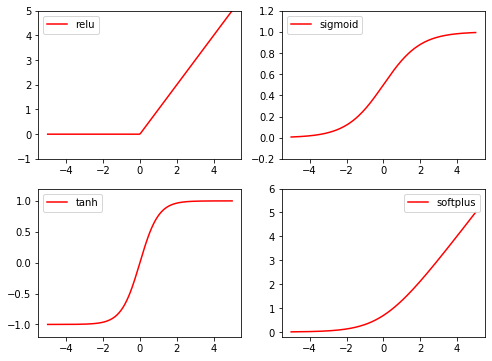

In [19]:
#  激励函数

import torch
import torch.nn.functional as F
from torch.autograd import Variable

x = torch.linspace(-5,5,200)# x data (tensor), shape=(100, 1)# x data (tensor), shape=(100, 1)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类

import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red',label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')
 
plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')
 
plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')
 
plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
 
plt.show()


In [56]:
# ===========关系拟合 (回归 Regression)==========

# 建立数据集
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
x = torch.unsqueeze(torch.linspace(-1,1,100),dim= 1)
x.shape
# torch.unsqueeze(input, dim) → Tensor 返回在指定位置插入的尺寸为1的新张量。返回的张量与此张量共享相同的基础数据。
# A dim value within the range [-input.dim() - 1, input.dim() + 1) can be used.
# Negative dim will correspond to unsqueeze() applied at dim = dim + input.dim() + 1.

torch.Size([100, 1])

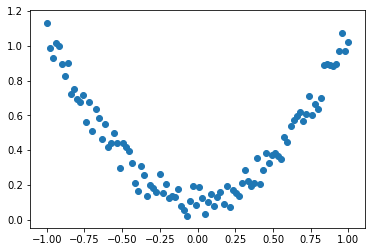

In [58]:
y = x.pow(2)+0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [68]:

# 建立神经网络
import torch
import torch.nn.functional as F
class Net(torch.nn.Module): # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output) # 输出层线性输出
        
    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x
net1 = Net(n_feature=1, n_hidden=10, n_output=1)

# 快速搭建
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
# 相比 net2 , net1  的好处就是, 你可以根据你的个人需要更加个性化你自己的前向传播过程, 比如(RNN)
print(net1)
print(net2)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [60]:
# 训练网络

# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)
 
for t in range(100):
    prediction = net1(x)     # 喂给 net 训练数据 x, 输出预测值
 
    loss = loss_func(prediction, y)     # 计算两者的误差
 
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

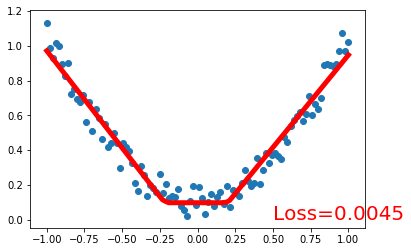

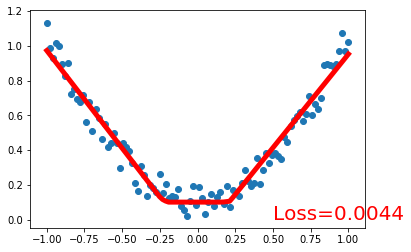

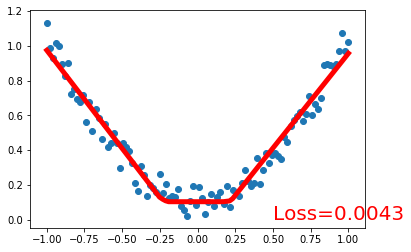

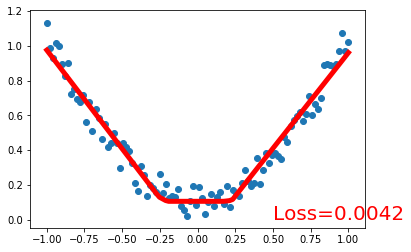

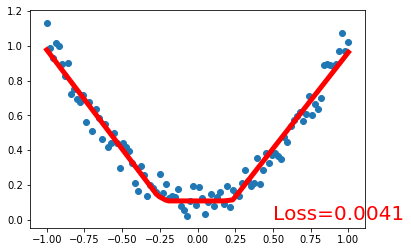

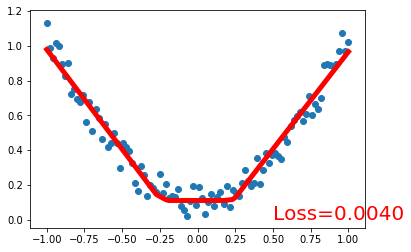

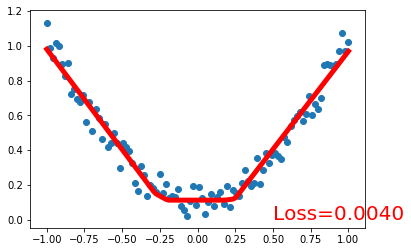

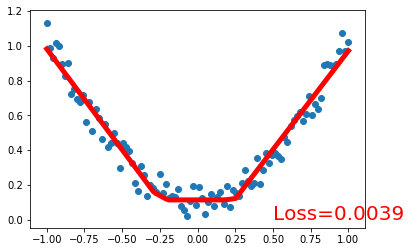

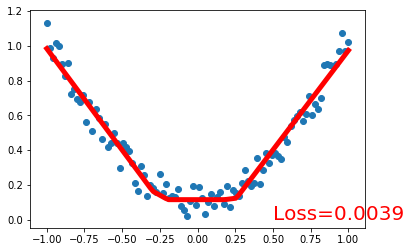

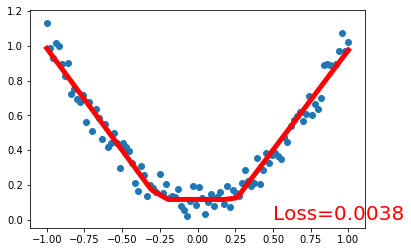

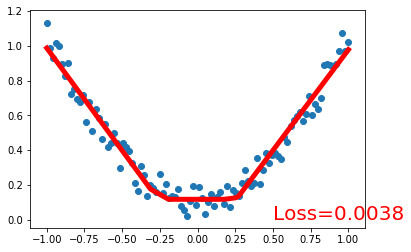

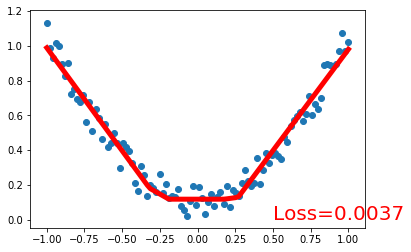

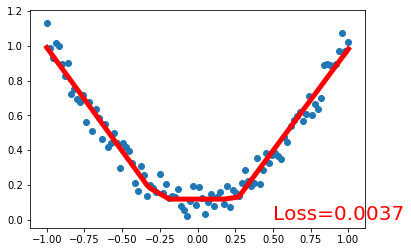

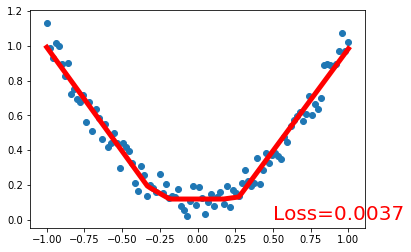

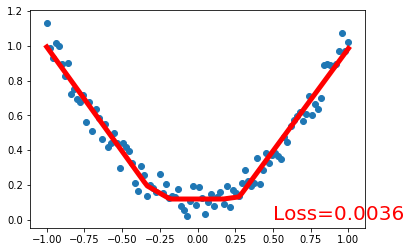

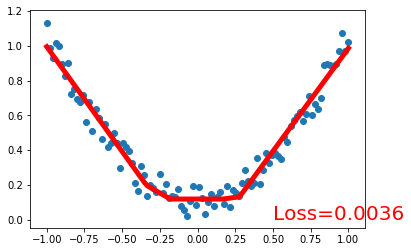

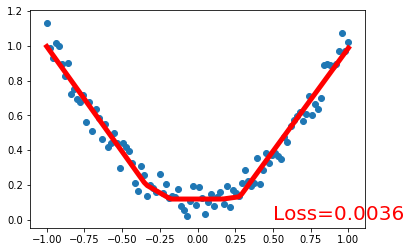

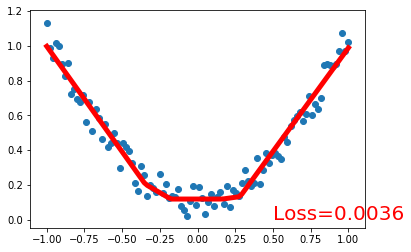

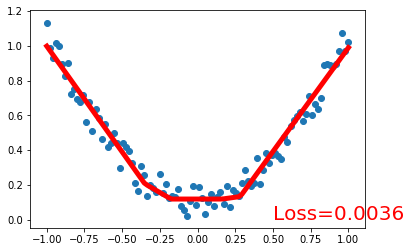

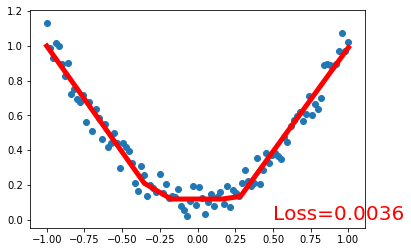

In [61]:
# 可视化训练过程

import matplotlib.pyplot as plt

plt.ion()
plt.show()

for t in range(100):
    prediction = net1(x)     # 喂给 net 训练数据 x, 输出预测值
 
    loss = loss_func(prediction, y)     # 计算两者的误差
 
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()
    
     # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.item(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
    

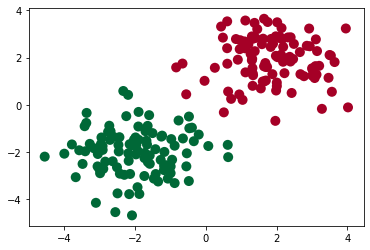

In [62]:
#  区分类型 (分类 Classification)

import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)
 
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer
 
# torch 只能在 Variable 上训练, 所以把它们变成 Variable
x, y = Variable(x), Variable(y)
 
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()
 


In [65]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


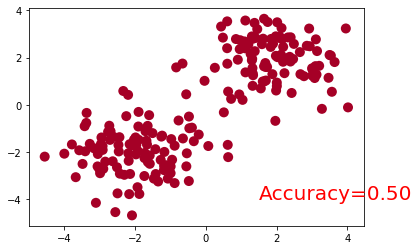

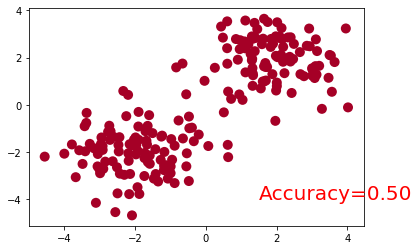

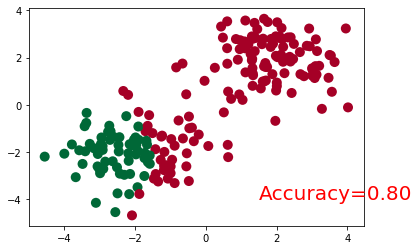

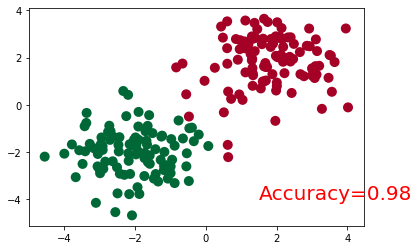

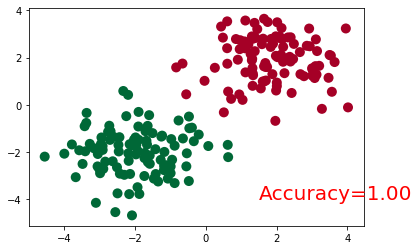

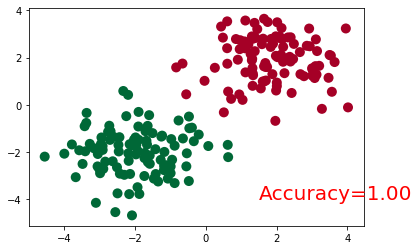

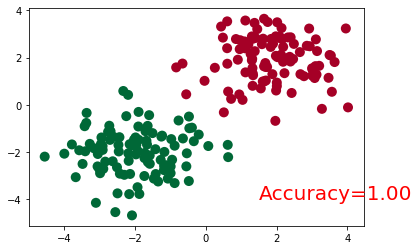

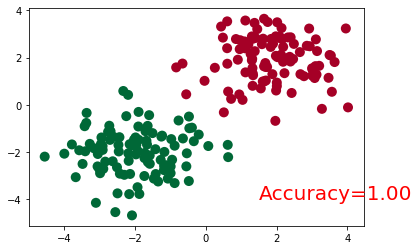

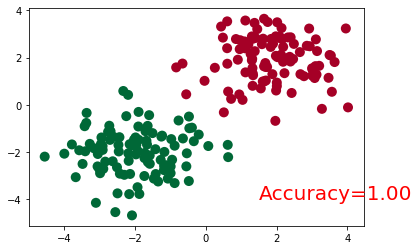

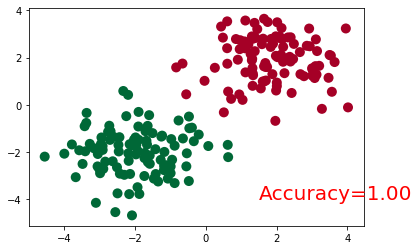

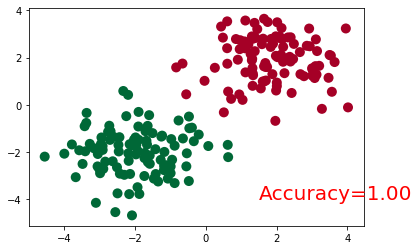

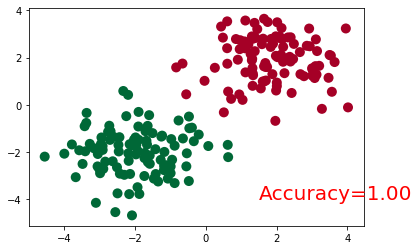

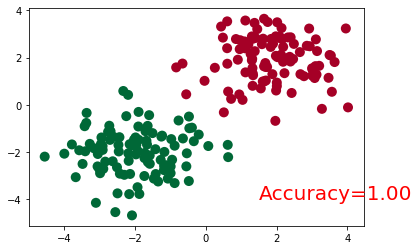

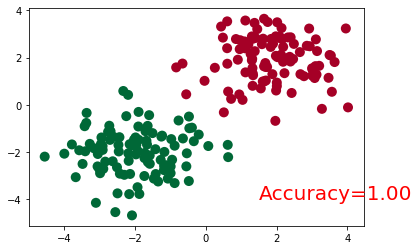

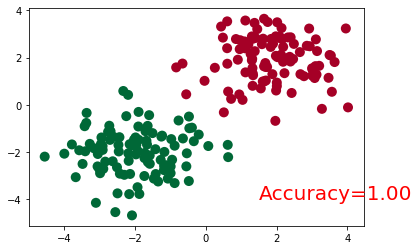

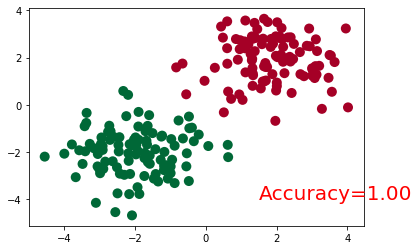

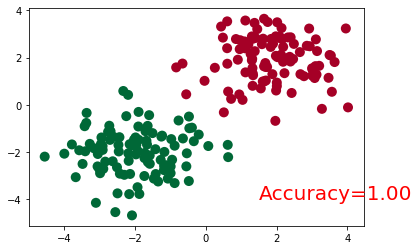

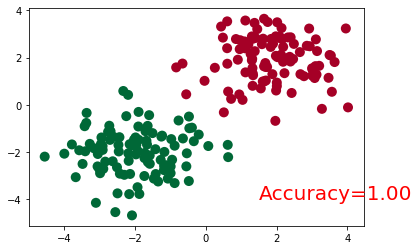

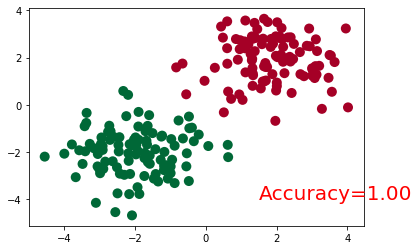

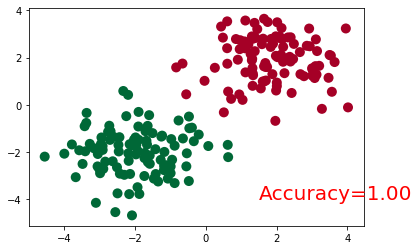

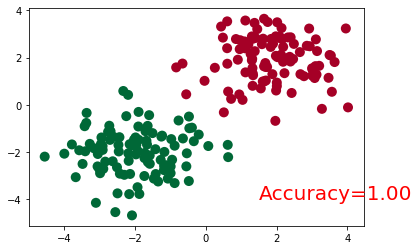

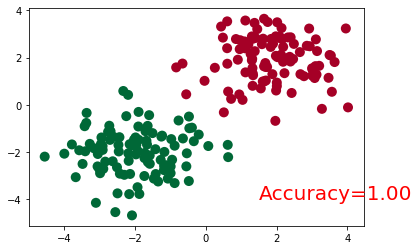

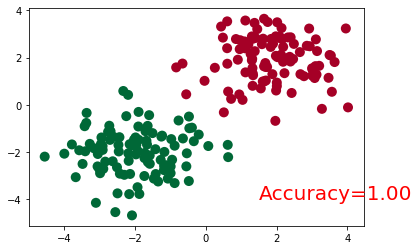

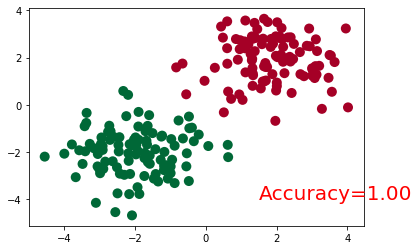

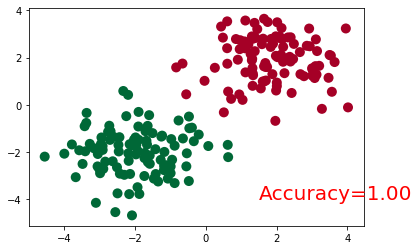

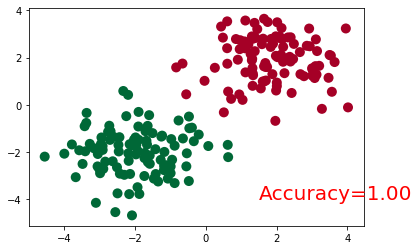

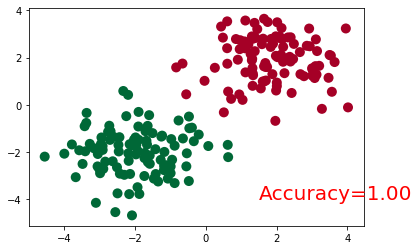

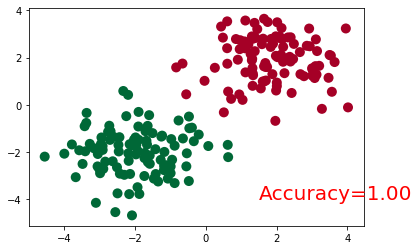

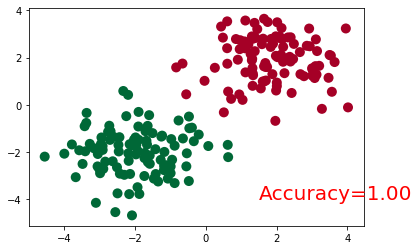

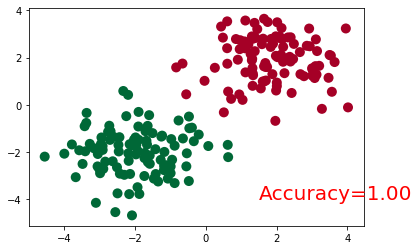

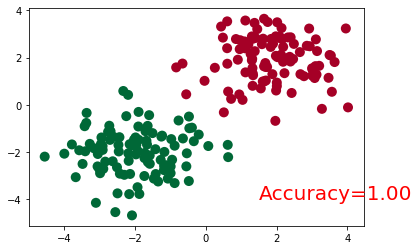

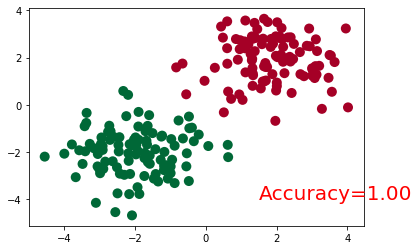

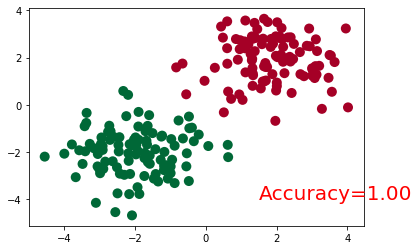

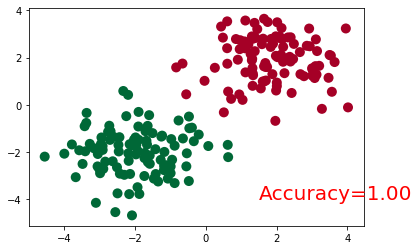

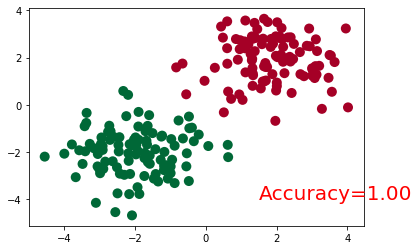

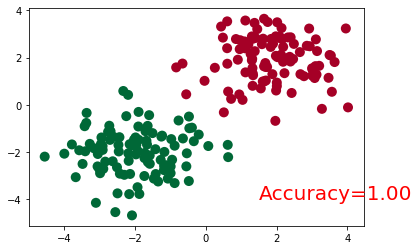

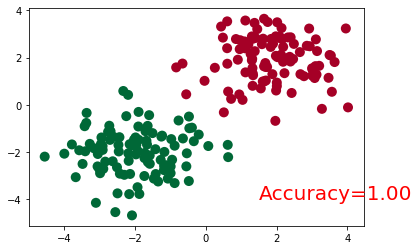

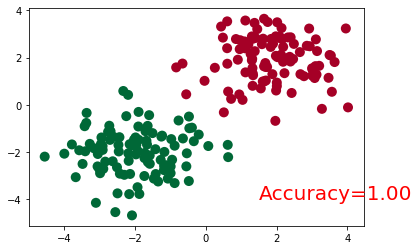

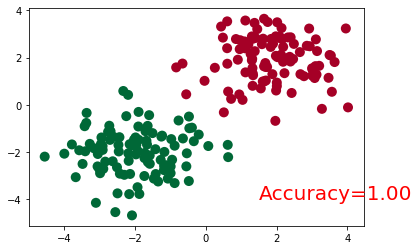

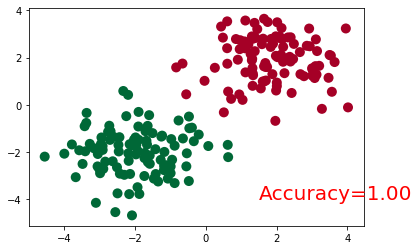

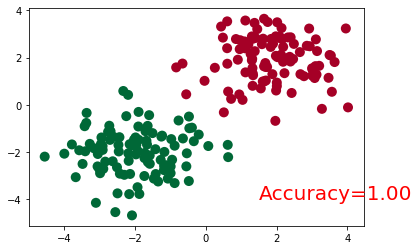

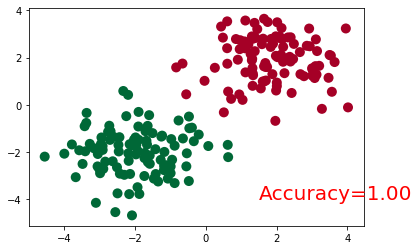

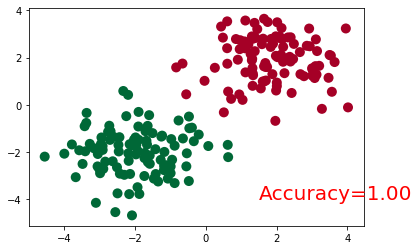

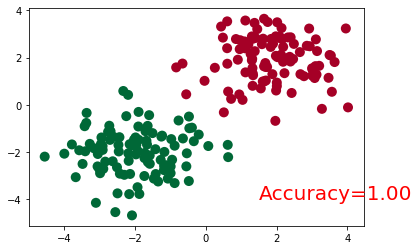

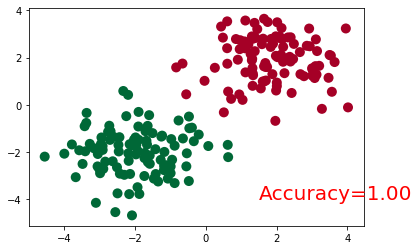

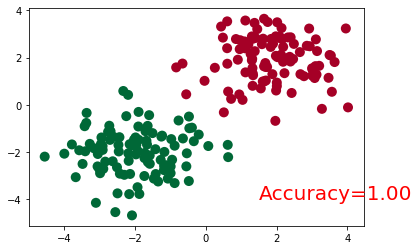

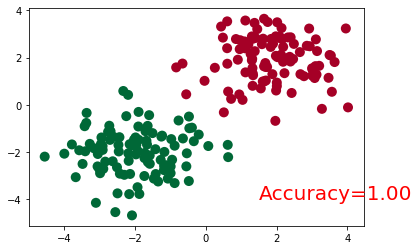

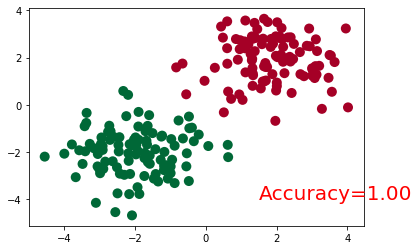

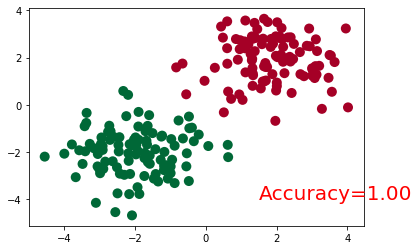

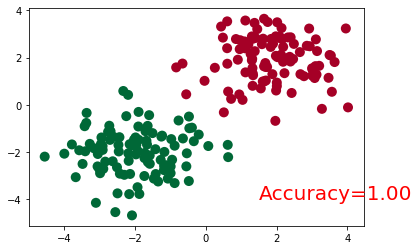

In [67]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

loss_func = torch.nn.CrossEntropyLoss()
plt.ion()
plt.show()
for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值
    loss = loss_func(out, y)     # 计算两者的误差
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    
    if t%2 ==0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()  # 停止画图
plt.show()

In [70]:
# 保存和恢复模型
torch.manual_seed(1) # 设计随机初始化种子

x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())
x, y = Variable(x, requires_grad=False),Variable(y,requires_grad=False)

def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
 
    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
torch.save(net1,'net.pkl')# 保存整个网络
torch.save(net1.state_dict(),'net_params.pkl') # 只保存网络中的参数 (速度快, 占内存少)

# 提取网络
# 提取整个神经网络, 网络大的时候可能会比较慢
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
# 提取所有的参数, 然后再放到你的新建网络中  
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)



D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [72]:
# =========数据读取===========

import torch
import torch.utils.data as Data
torch.manual_seed(1)    # reproducible
 
BATCH_SIZE = 5      # 批训练的数据个数
 
x = torch.linspace(1, 10, 10)       # x data (torch tensor)
y = torch.linspace(10, 1, 10)       # y data (torch tensor)
 
# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(x, y)
 
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)
 
for epoch in range(3):   # 训练所有!整套!数据 3 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        # 假设这里就是你训练的地方...
 
        # 打出来一些数据
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 5.  7. 10.  3.  4.] | batch y:  [6. 4. 1. 8. 7.]
Epoch:  0 | Step:  1 | batch x:  [2. 1. 8. 9. 6.] | batch y:  [ 9. 10.  3.  2.  5.]
Epoch:  1 | Step:  0 | batch x:  [ 4.  6.  7. 10.  8.] | batch y:  [7. 5. 4. 1. 3.]
Epoch:  1 | Step:  1 | batch x:  [5. 3. 2. 1. 9.] | batch y:  [ 6.  8.  9. 10.  2.]
Epoch:  2 | Step:  0 | batch x:  [ 4.  2.  5.  6. 10.] | batch y:  [7. 9. 6. 5. 1.]
Epoch:  2 | Step:  1 | batch x:  [3. 9. 1. 8. 7.] | batch y:  [ 8.  2. 10.  3.  4.]


In [ ]:
# 优化器

# different optimizers
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))

In [77]:
# ==============CNN==============
# MNIST 手写数据
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision      # 数据库模块
import matplotlib.pyplot as plt
 
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 50
LR = 0.001          # 学习率
DOWNLOAD_MNIST = True  # 如果你已经下载好了mnist数据就写上 Fasle
 
 
# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)

In [78]:
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
 
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
 
# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  import sys
D:\Users\13734\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [79]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,      # 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)   # 展平多维的卷积图成 (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [84]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y
        
        output = cnn(b_x)              # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        if step % 50 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
              

Epoch:  0 | train loss: 0.0756 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0287 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0101 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0544 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1314 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0160 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1075 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1513 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0426 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0103 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0167 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0493 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0636 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0819 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0922 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0260 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0132 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0163 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1408 | test accuracy

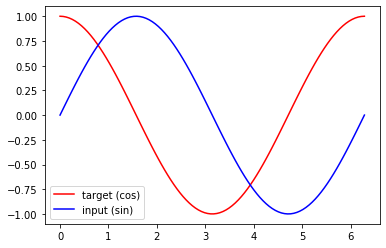

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


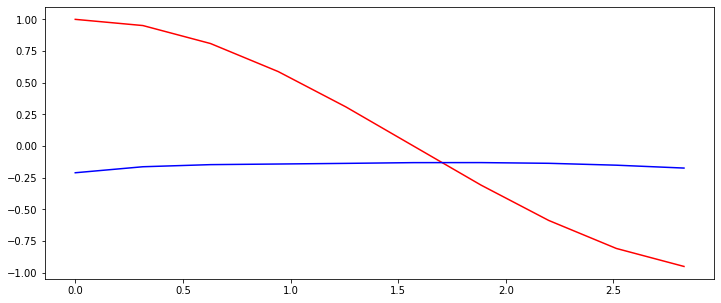

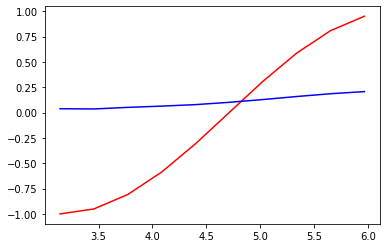

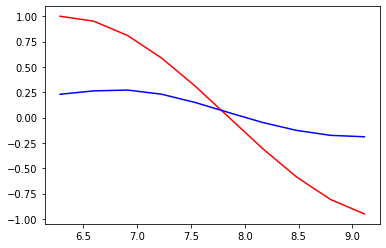

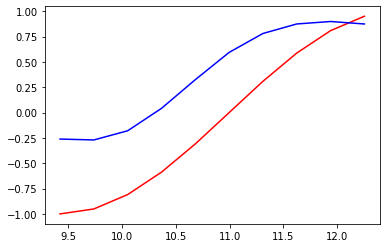

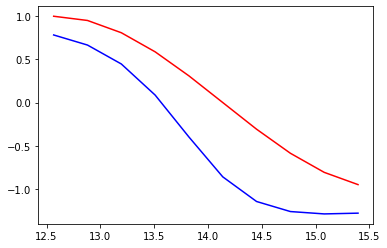

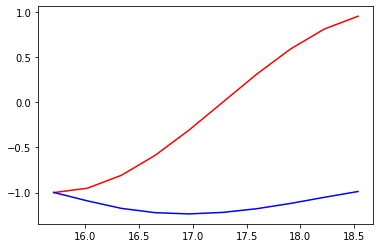

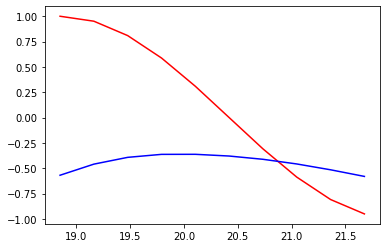

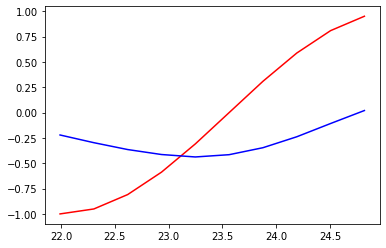

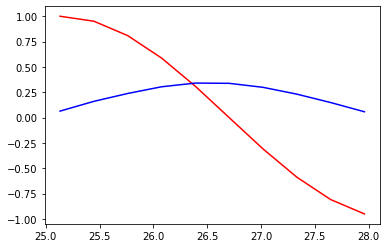

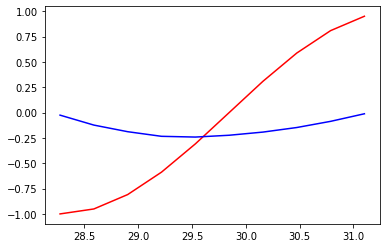

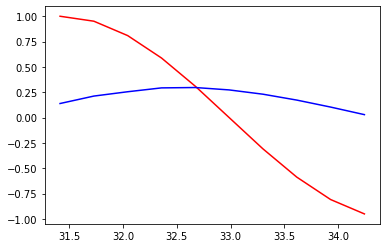

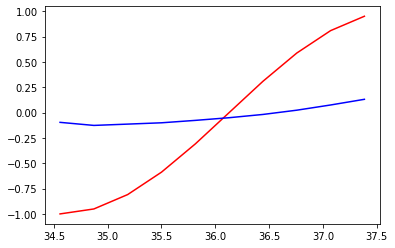

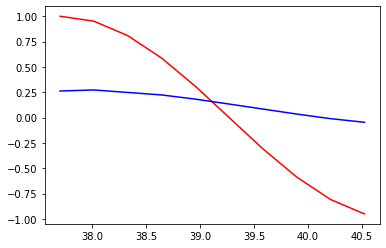

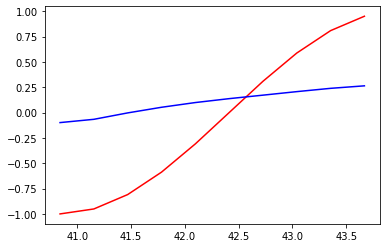

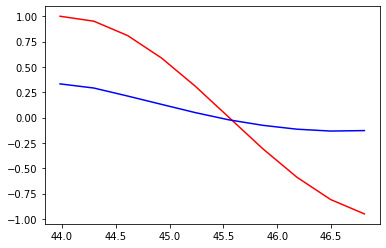

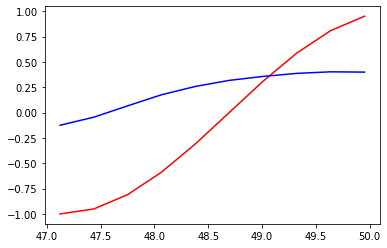

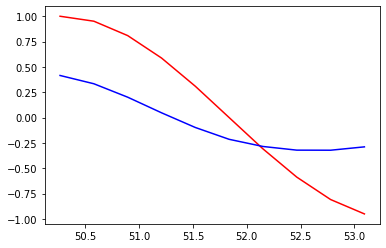

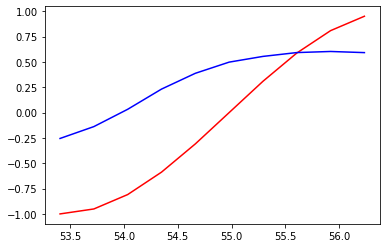

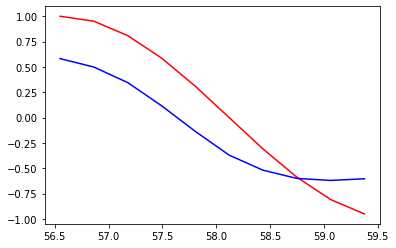

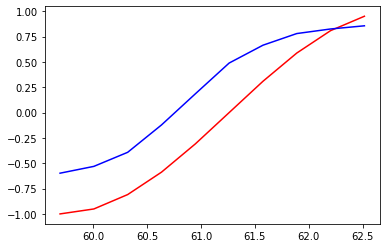

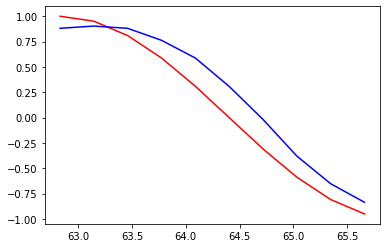

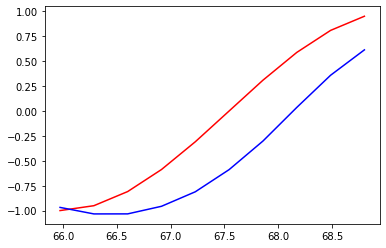

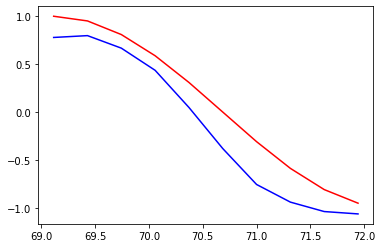

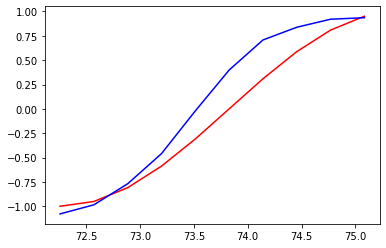

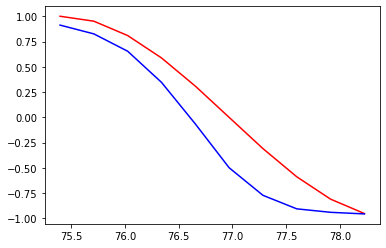

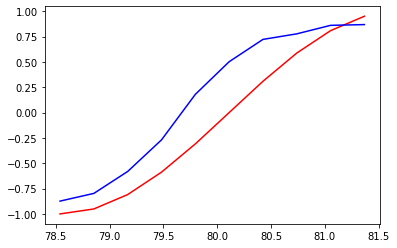

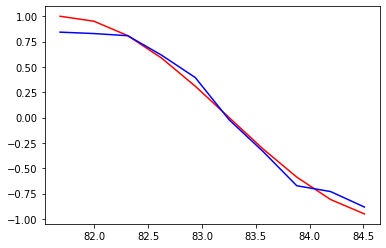

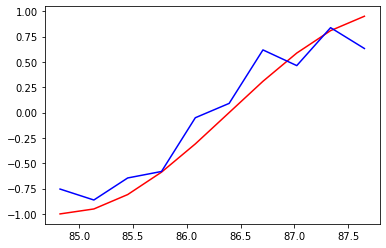

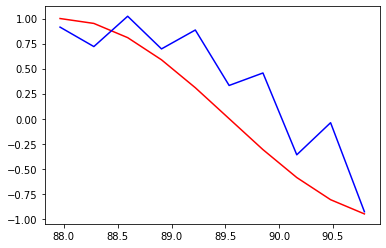

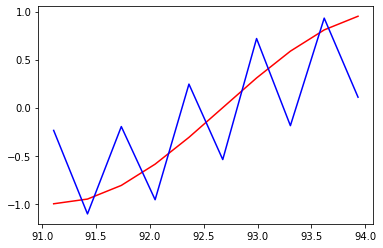

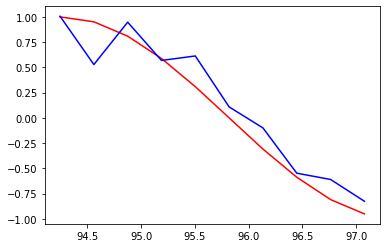

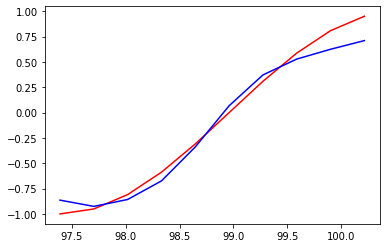

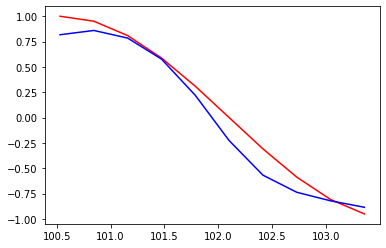

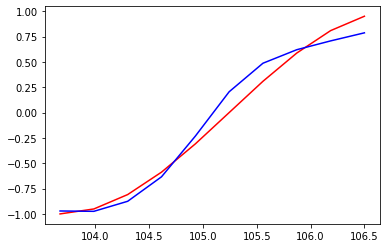

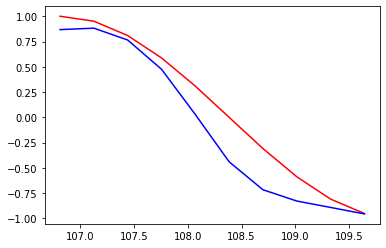

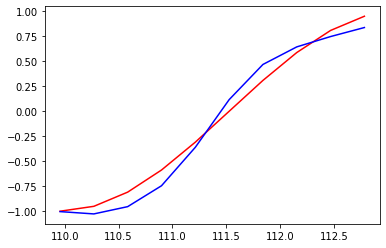

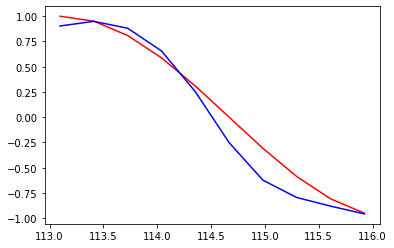

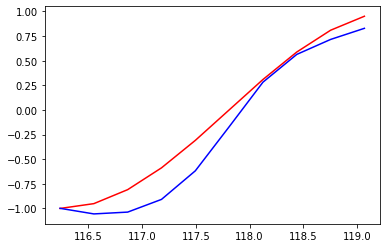

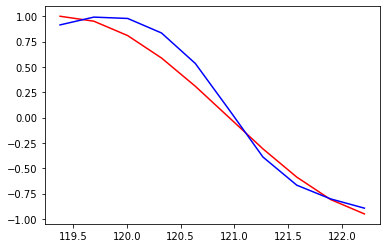

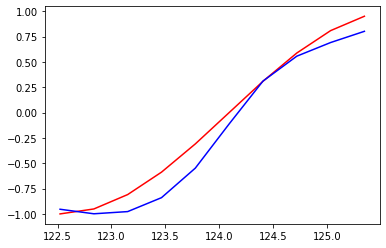

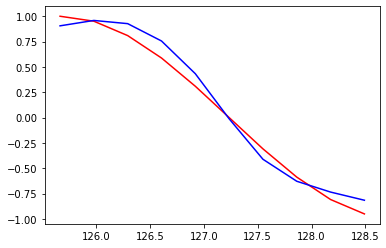

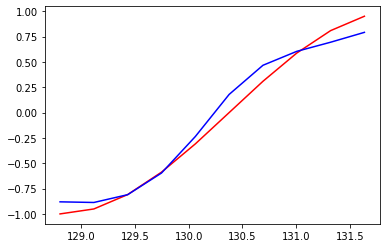

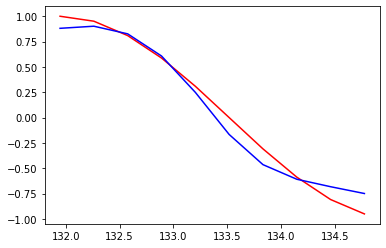

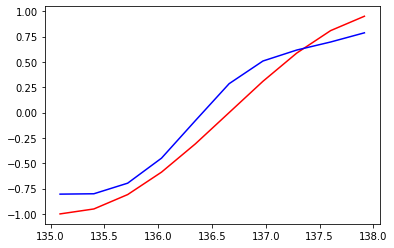

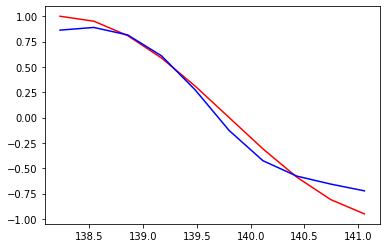

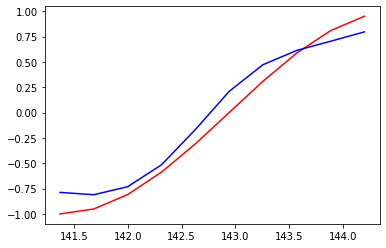

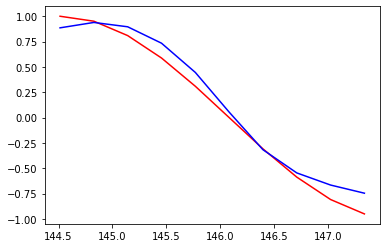

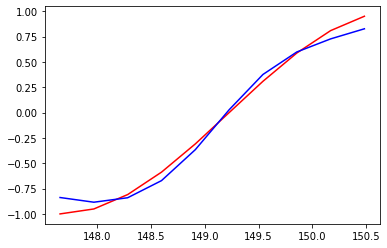

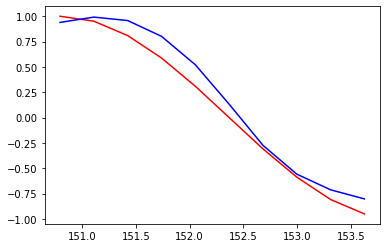

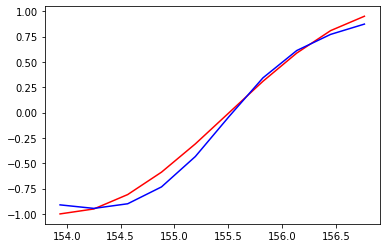

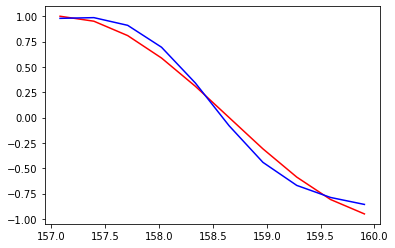

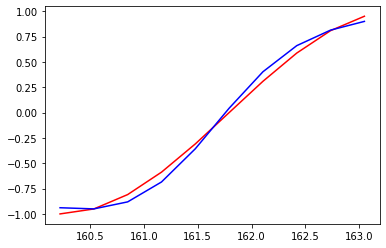

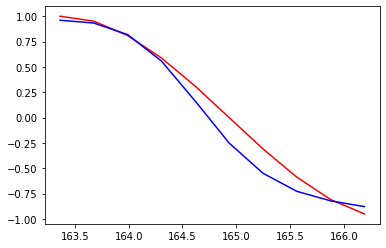

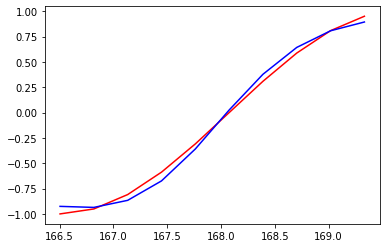

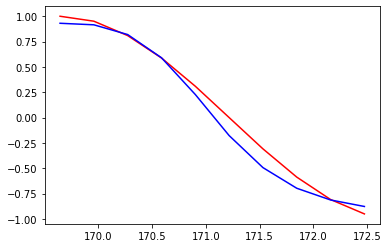

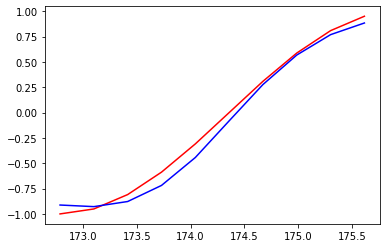

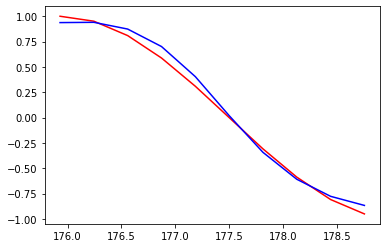

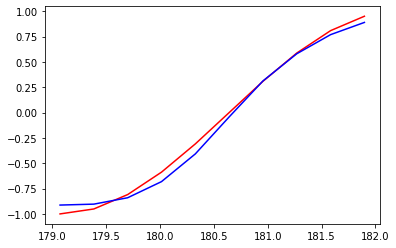

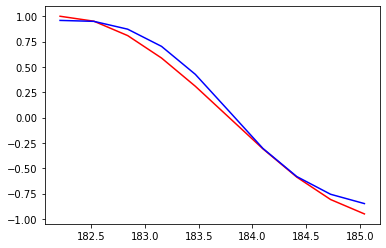

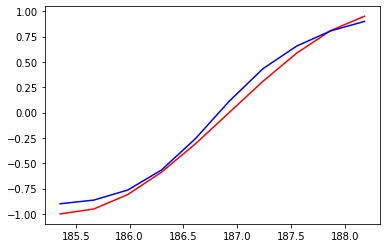

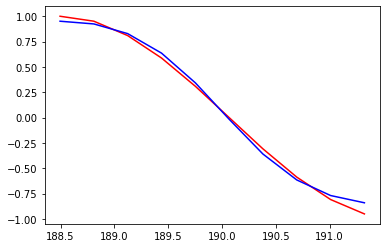

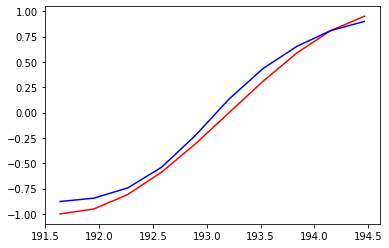

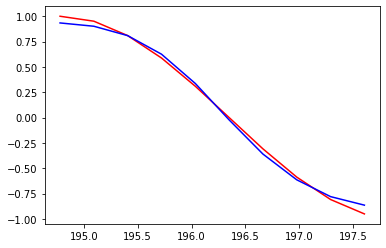

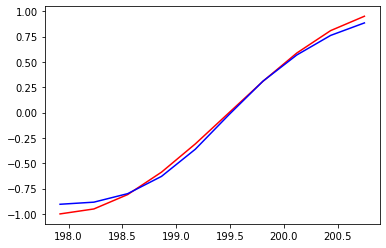

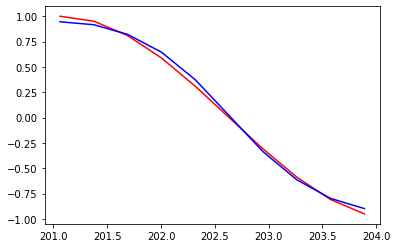

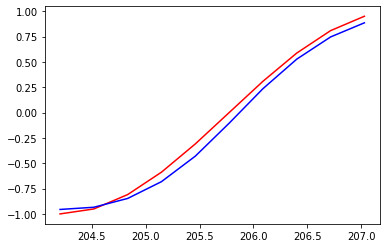

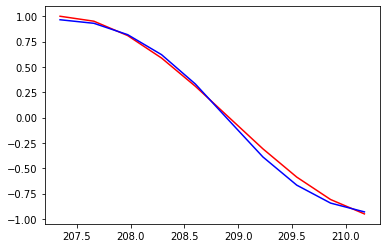

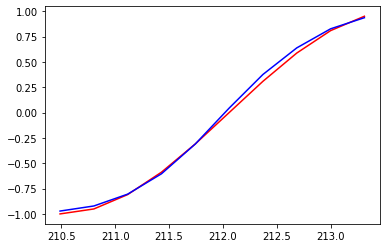

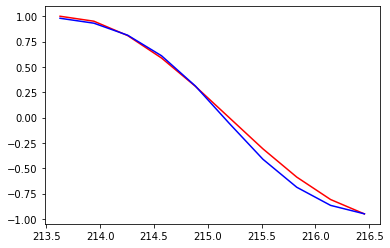

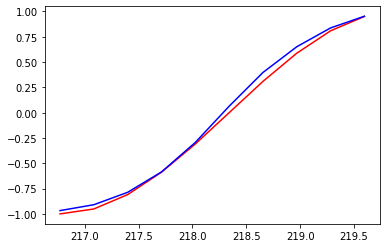

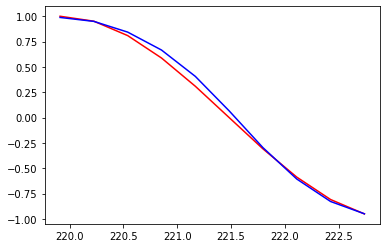

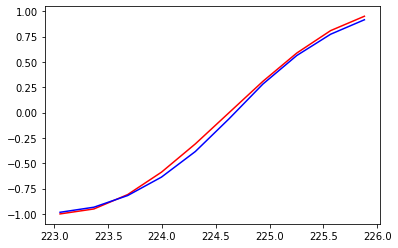

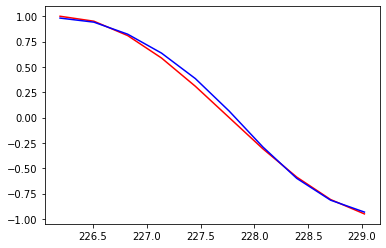

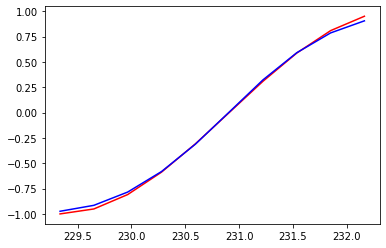

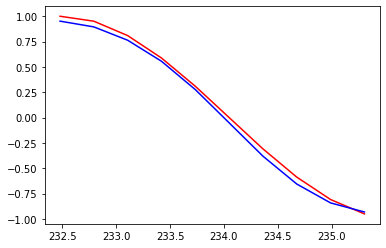

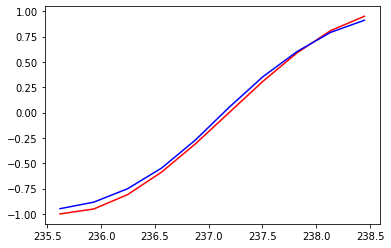

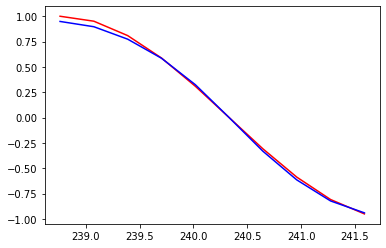

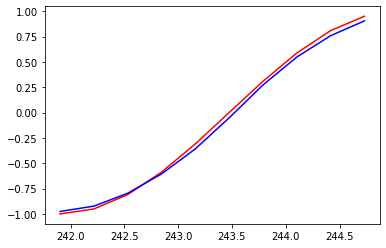

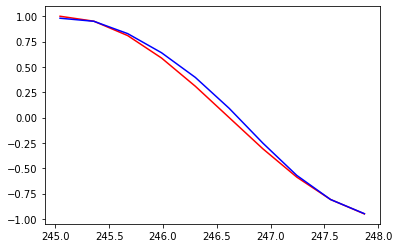

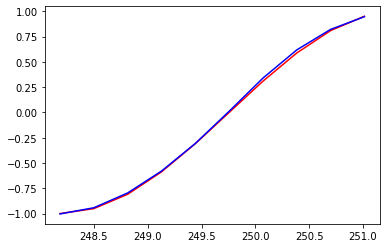

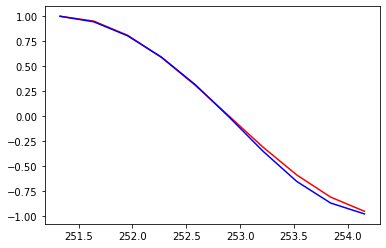

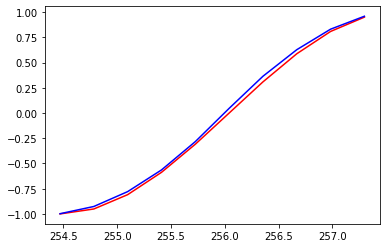

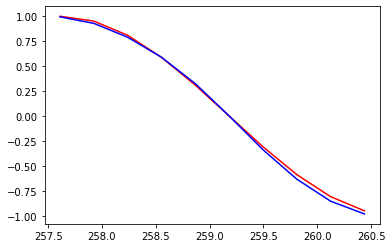

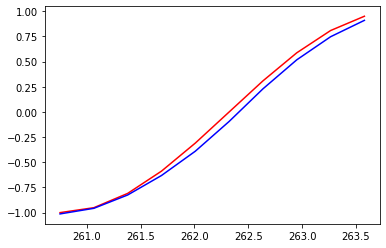

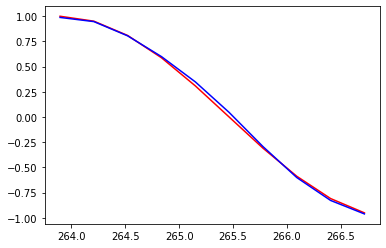

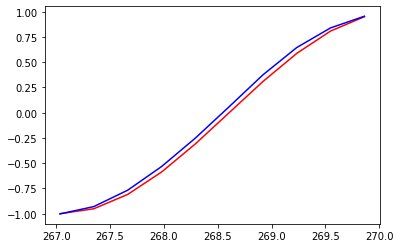

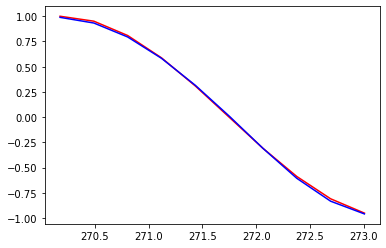

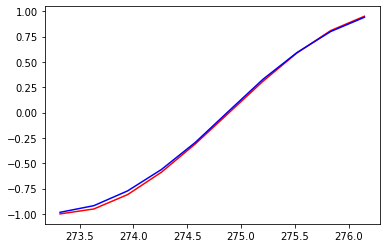

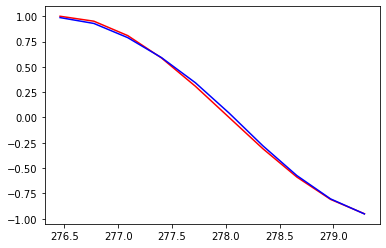

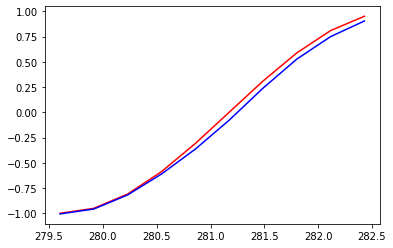

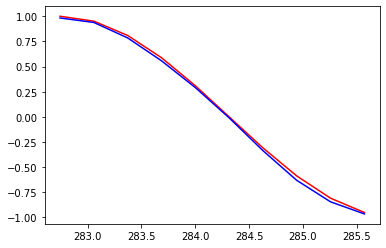

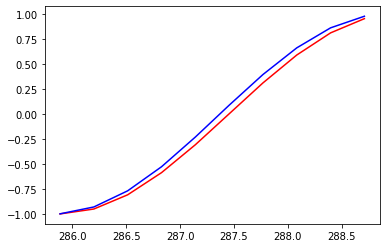

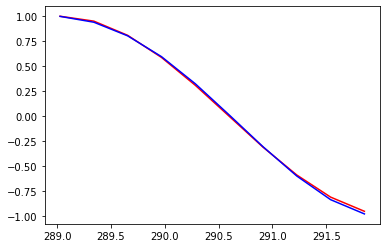

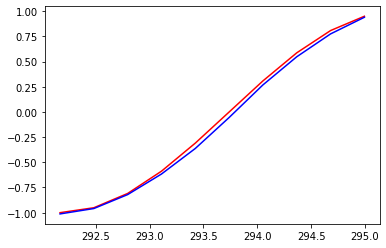

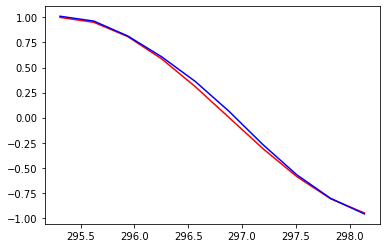

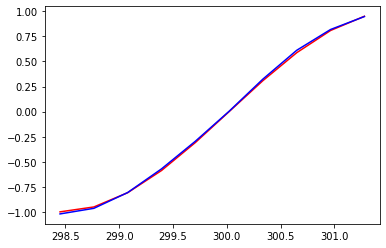

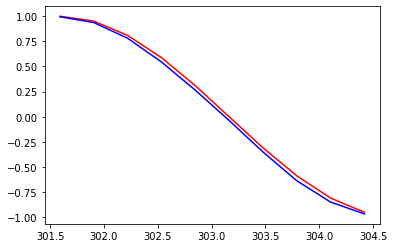

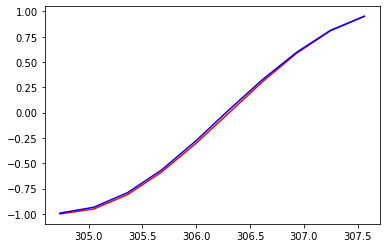

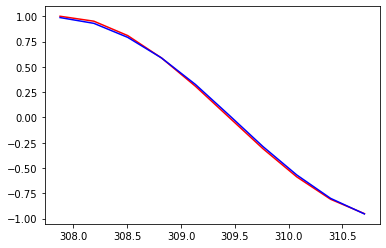

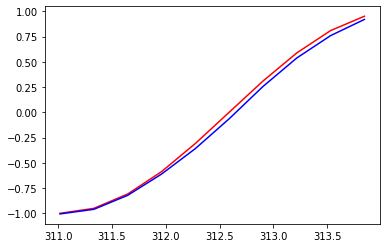

In [99]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)  # float32 for converting torch FloatTensor
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

        # instead, for simplicity, you can replace above codes by follows
        # r_out = r_out.view(-1, 32)
        # outs = self.out(r_out)
        # outs = outs.view(-1, TIME_STEP, 1)
        # return outs, h_state
        
        # or even simpler, since nn.Linear can accept inputs of any dimension 
        # and returns outputs with same dimension except for the last
        # outs = self.out(r_out)
        # return outs

rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32, endpoint=False)  # float32 for converting torch FloatTensor
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = h_state.data        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()